In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier



# **Data Collecting**

In [2]:
#untuk membaca file

df = pd.read_csv ("/content/loan_data.csv")

In [3]:
#untuk menampilkan data
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


# **Exploratory Data Analysis**

In [4]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<ipython-input-5-680e407dccc1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(kind='count', x='not.fully.paid', height=6, aspect=1.2, data=df, palette='Set2')


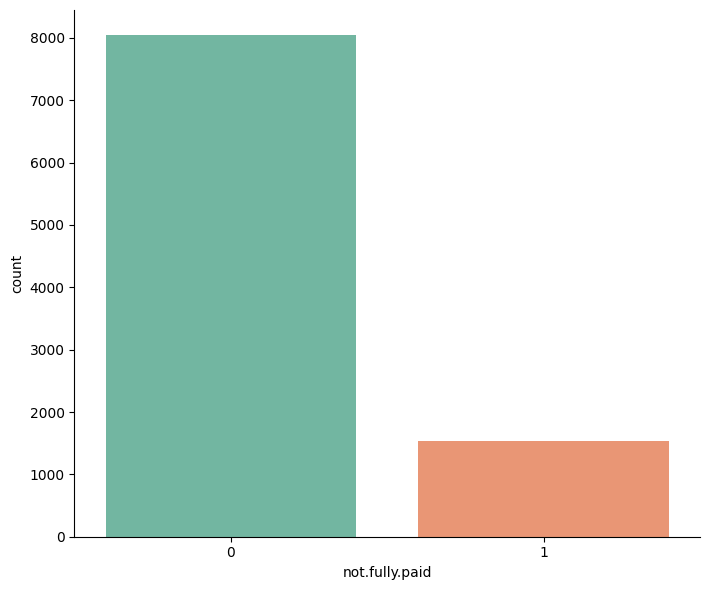

In [5]:
# Assuming 'loan_status' is the column you want to visualize
sns.catplot(kind='count', x='not.fully.paid', height=6, aspect=1.2, data=df, palette='Set2')
plt.show()

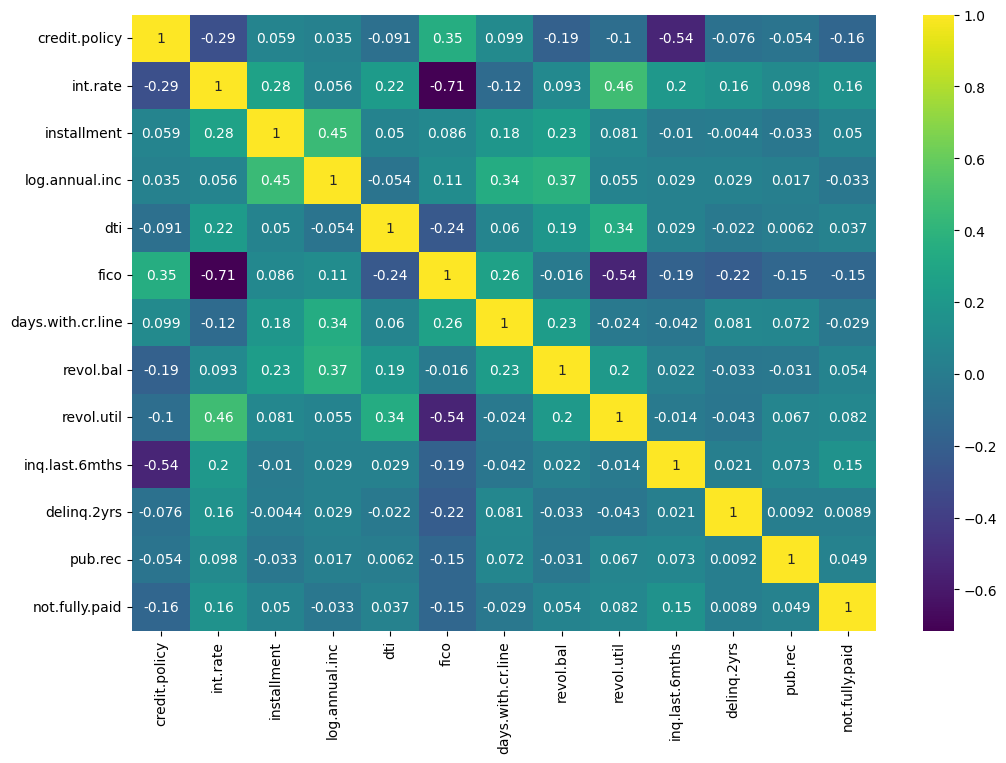

In [6]:
# corelation matrix
plt.figure(figsize=(12, 8))
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')
plt.show()

not.fully.paid memiliki korelasi baik dengan int.rate dan inq.last.6mnths;

In [7]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# **Preprocessing Data**

## **Data Cleaning: Missing Value Check**

In [8]:
#preprocessing data
#cek mising value
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## **One Hot Encoding**

In [9]:
df=pd.get_dummies(df,columns=['purpose'])
df

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,False,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,True,False,False,False,False,False,False
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,True,False,False,False,False,False,False
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,False,False,True,False,False,False,False
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,False,False,False,False,True,False,False


Tidak ada missing value pada data

# **Modelling**

# **cnn**

In [10]:
#split data, data test 20% atau 0.2, data training 80%
from sklearn.model_selection import train_test_split
X=df.drop("not.fully.paid",axis=1)
y=df["not.fully.paid"]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.models import Sequential


In [12]:
X_train

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
7317,1,0.1459,327.42,9.994242,11.41,692,5239.041667,144,28.8,1,0,0,False,False,False,False,False,True,False
350,1,0.0838,236.34,11.225243,6.06,742,3149.041667,4286,40.4,0,0,0,False,True,False,False,False,False,False
5206,1,0.1148,138.47,11.170435,6.83,717,3810.000000,11974,72.1,1,0,0,False,False,True,False,False,False,False
2673,1,0.0932,527.13,11.058858,8.35,732,4079.958333,41921,85.2,0,0,0,True,False,False,False,False,False,False
3528,1,0.1126,312.21,10.693398,19.04,757,7049.958333,336,4.7,1,0,0,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,1,0.1357,169.85,10.422281,10.71,677,5190.041667,179,44.7,2,1,0,False,False,True,False,False,False,False
5191,1,0.1426,806.19,11.066638,24.88,702,10409.958330,30803,84.4,1,0,0,False,False,True,False,False,False,False
5390,1,0.1426,720.43,11.018629,18.85,692,5459.958333,18020,34.9,0,0,0,False,False,True,False,False,False,False
860,1,0.1166,247.90,11.002100,19.22,687,4530.000000,17745,92.4,1,0,0,False,False,True,False,False,False,False


In [13]:
y_train.shape

(7662,)

In [14]:
import numpy as np

trainX = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
testX = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))

In [15]:
trainX

array([[1, 0.1459, 327.42, ..., False, True, False],
       [1, 0.0838, 236.34, ..., False, False, False],
       [1, 0.1148, 138.47, ..., False, False, False],
       ...,
       [1, 0.1426, 720.43, ..., False, False, False],
       [1, 0.1166, 247.9, ..., False, False, False],
       [1, 0.1385, 327.4, ..., False, False, False]], dtype=object)

In [16]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [17]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool1D, BatchNormalization

model = Sequential()

model.add(Conv1D(filters = 128, kernel_size = 2,padding = 'Same',
                 activation ='relu', input_shape = (trainX.shape[1], 1)))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Conv1D(filters = 128, kernel_size = 2,padding = 'Same',
                 activation ='relu'))
model.add(MaxPool1D(pool_size=(2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation = "sigmoid"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 19, 128)           384       
                                                                 
 max_pooling1d (MaxPooling1  (None, 9, 128)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 9, 128)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 128)            32896     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 4, 128)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 128)            0

In [19]:
X_train

array([[1.0000e+00, 1.4590e-01, 3.2742e+02, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.0000e+00, 8.3800e-02, 2.3634e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.1480e-01, 1.3847e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 1.4260e-01, 7.2043e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.1660e-01, 2.4790e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 1.3850e-01, 3.2740e+02, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]], dtype=float32)

In [20]:
# Define the optimizer
from keras.optimizers import SGD
optimizer = sgd = SGD(learning_rate=0.01)
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10,batch_size=128, verbose=1, shuffle =True)

Epoch 1/10
60/60 [==============================] - 4s 35ms/step - loss: 52341997018788234232179195904.0000 - accuracy: 0.8083 - val_loss: 0.6327 - val_accuracy: 0.8408
Epoch 2/10
60/60 [==============================] - 2s 29ms/step - loss: 0.6101 - accuracy: 0.8397 - val_loss: 0.5882 - val_accuracy: 0.8408
Epoch 3/10
60/60 [==============================] - 1s 25ms/step - loss: 0.5715 - accuracy: 0.8397 - val_loss: 0.5548 - val_accuracy: 0.8408
Epoch 4/10
60/60 [==============================] - 2s 26ms/step - loss: 0.5425 - accuracy: 0.8397 - val_loss: 0.5297 - val_accuracy: 0.8408
Epoch 5/10
60/60 [==============================] - 1s 25ms/step - loss: 0.5206 - accuracy: 0.8397 - val_loss: 0.5105 - val_accuracy: 0.8408
Epoch 6/10
60/60 [==============================] - 1s 19ms/step - loss: 0.5038 - accuracy: 0.8397 - val_loss: 0.4958 - val_accuracy: 0.8408
Epoch 7/10
60/60 [==============================] - 1s 18ms/step - loss: 0.4909 - accuracy: 0.8397 - val_loss: 0.4844 - val_ac